In [20]:
#エクセルファイルの変換を目指して
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import math
def Base_10_to_n(X, n):
    X_dumy = X
    out = ''
    while X_dumy>0:
        out = str(X_dumy%n)+out
        X_dumy = int(X_dumy/n)
    return out

def count(spam, var, leng):
    found = 0
    for i in range(len(spam) - leng +1):
        if spam[i:(i+leng)] == var:
            found += 1
    return found
def Base_n_to_10(X,n):
    out = 0
    for i in range(1,len(str(X))+1):
        out += int(X[-i])*(n**(i-1))
    return out#int out
def Base_n_to_m(X, n, m):
    return Base_n_to_10(Base_10_to_n(X, n), m)


In [21]:
#ファイルの読み込み
file_name1 = 'B39 restraint R2'
file_name2 = 'B39 restraint R3'
file1 = pd.ExcelFile(file_name1+'.xlsx')
file2 = pd.ExcelFile(file_name2+'.xlsx')
#time_file = open(file_name1 + '_' + file_name2 +'_time_data.csv', 'w')

time_leng = 10
pattern_leng = 9


sheet_df1 = file1.parse(file1.sheet_names, header=None)
sheet_df2 = file2.parse(file2.sheet_names, header=None)

cmap = plt.get_cmap("tab20")

sheet_names1 = file1.sheet_names
sheet_names2 = file2.sheet_names

max_psth1 = 0
max_psth2 = 0

sum_pattern1 = 0
sum_pattern2 = 0

pattern_dict1 = {}
pattern_dict2 = {}

In [ ]:
#ファイル1のデータカウント
for i, name in enumerate(sheet_names1):
    sheet_df1[i] = file1.parse(name)
    end_number = (np.where(sheet_df1[i]['INFORMATION']=="CHANNEL")[0][1])
    #print(sheet_df1[i])
    sig1 = (sheet_df1[i]['Unnamed: 3'][24:end_number-5])
    #sig1 = sig1 - sig1.mean()
    leng = end_number - 5 -24 - time_leng
    psth = np.empty(leng, dtype=np.int)
    for k in range(leng) :
        psth[k] = sig1[k : k+time_leng].sum()
    #x = np.linspace(0, leng-1, leng)
    for k in range(len(psth) - pattern_leng + 1) :
        if (str(psth[k : k+ pattern_leng]) in pattern_dict1) : 
            pattern_dict1[str(psth[k : k+ pattern_leng])] += 1
        else : 
            pattern_dict1[str(psth[k : k+ pattern_leng])] = 1

print(pattern_dict1)

In [4]:
#ファイル2のデータカウント
for i, name in enumerate(sheet_names2):
    sheet_df2[i] = file2.parse(name)
    end_number = (np.where(sheet_df2[i]['INFORMATION']=="CHANNEL")[0][1])
    sig1 = (sheet_df2[i]['Unnamed: 3'][24:end_number-5])
    leng = end_number - 5 -24 - time_leng
    psth = np.empty(leng, dtype=np.int)
    for k in range(leng) :
        psth[k] = sig1[k : k+time_leng].sum()
    for k in range(len(psth) - pattern_leng + 1) :
        if (str(psth[k : k+ pattern_leng]) in pattern_dict2) : 
            pattern_dict2[str(psth[k : k+ pattern_leng])] += 1
        else : 
            pattern_dict2[str(psth[k : k+ pattern_leng])] = 1

print(pattern_dict2)

{'[0 0 0]': 33942, '[0 0 1]': 1338, '[0 1 1]': 1399, '[1 1 1]': 2903, '[1 1 0]': 1398, '[1 0 0]': 1336, '[1 0 1]': 61}


In [37]:
#情報量の計算準備
if(max_psth1 >= max_psth2) : 
    max_psth = max_psth1
    min_psth = max_psth2
else : 
    max_psth = max_psth2
    min_psth = max_psth1

sum_pattern = sum_pattern1 + sum_pattern2
psth_count = psth_count1 + psth_count2
pattern_information = np.zeros(((max_psth + 1) ** pattern_leng))
print(max_psth)
print(min_psth)
print(sum_pattern)
print(psth_count)

1
1
78352
[65403  2045     0  2126  2045    83  2127  4523]


In [39]:
#情報量の計算
pattern_information = np.zeros(((min_psth + 1) ** pattern_leng))
x = np.zeros((max_psth + 1) ** pattern_leng, dtype=object)
for i in range((min_psth + 1) ** pattern_leng) :
    print(i)
    p1 = psth_count1[Base_n_to_m(i, max_psth1+1, min_psth+1)] / sum_pattern1
    print(p1)
    p2 = psth_count2[Base_n_to_m(i, max_psth2+1, min_psth+1)] / sum_pattern2
    x[i]  = str(Base_10_to_n(i, (min_psth + 1))).zfill(pattern_leng)
    if (p1 != 0) and (p2 != 0) : 
        pattern_information[i] = p1 * math.log2(p1/p2)
        #print(p1 * math.log2(p1/p2))
    else :
        pattern_information[i] = 0
    print(x[i])

print(pattern_leng)
print(pattern_information)
print(sum(pattern_information))

0
0.8801899522524392
000
1
0.019021175005189954
001
2
0.0
010
3
0.019566119991696076
011
4
0.019021175005189954
100
5
0.0005708947477683205
101
6
0.019592069752958272
110
7
0.04203861324475815
111
3
[ 0.13609167 -0.01507887  0.         -0.01597579 -0.01507887 -0.00081305
 -0.01595951 -0.03339587]
0.03978972381814426


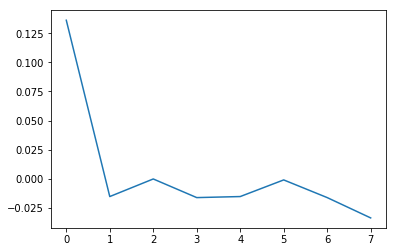

['000' '001' '010' '011' '100' '101' '110' '111']


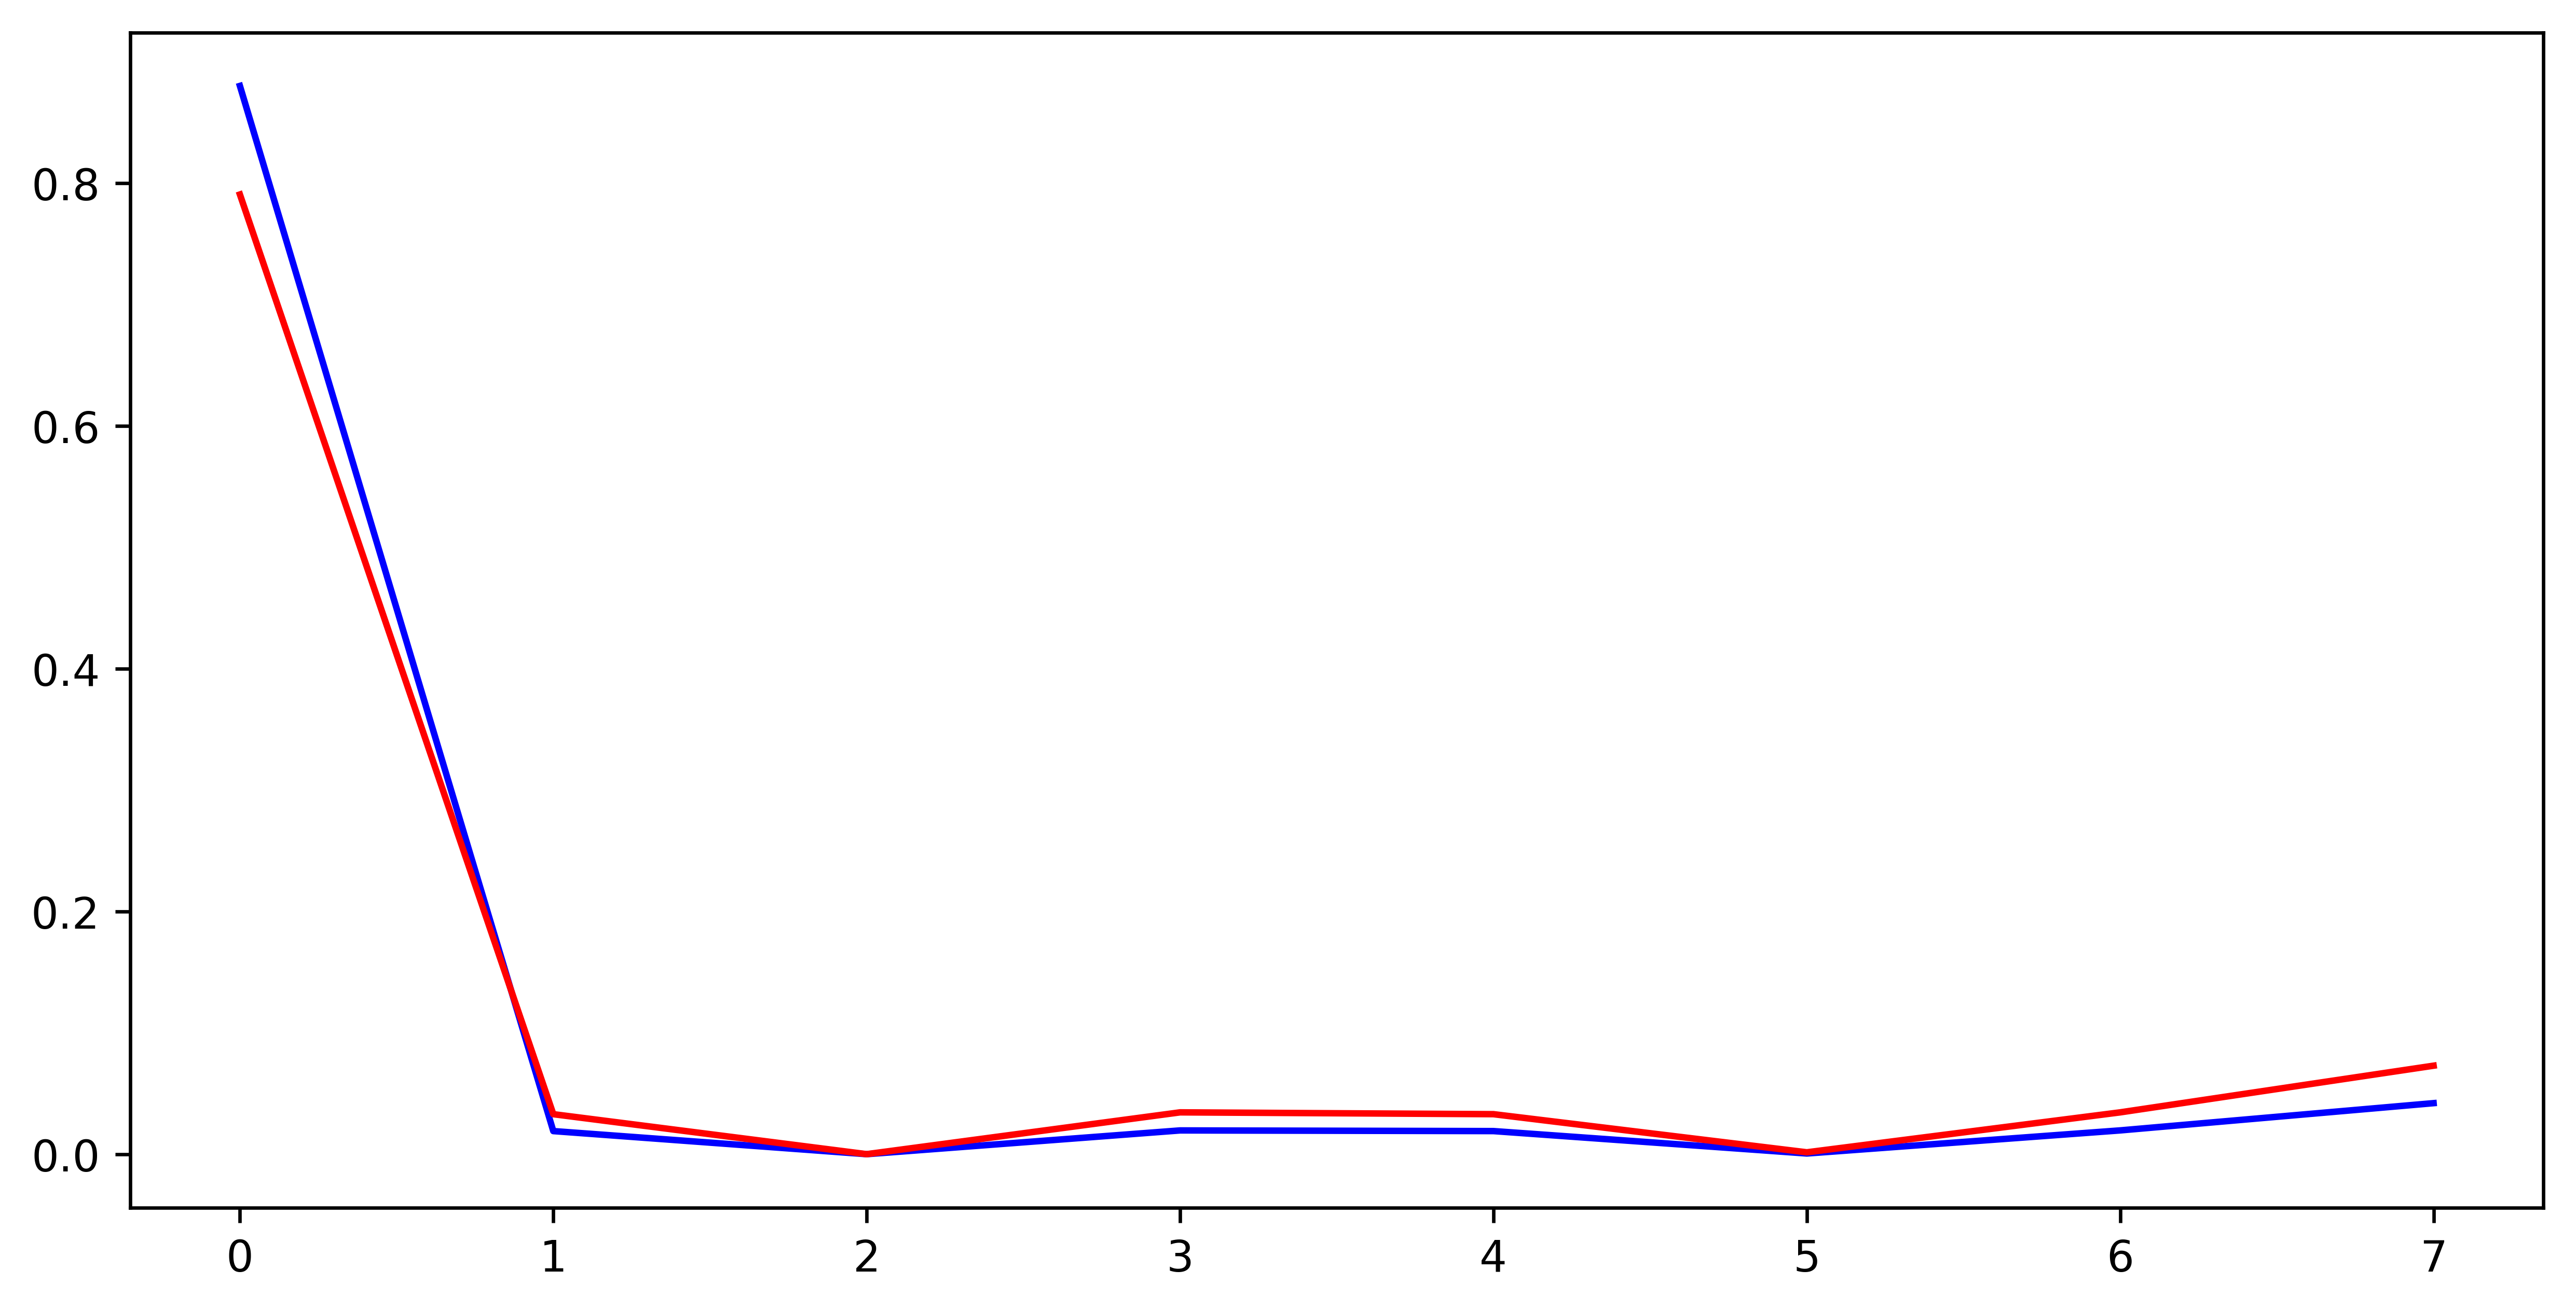

In [40]:
import matplotlib.ticker as ticker
plt.plot(pattern_information)
plt.show()
print(x)

fig = plt.figure(figsize=(10, 5), dpi=600)
ax = fig.gca()
plt.plot(psth_count1/sum_pattern1, color="blue")
plt.plot(psth_count2/sum_pattern2, color="red")
#plt.set_xticklabels(x)
#ax.set_xticklabels(x, rotation=90)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(x))
#ax.xticks(rotation=70)
plt.savefig("./info_graph/" + str(pattern_leng) + ".png")
plt.show()